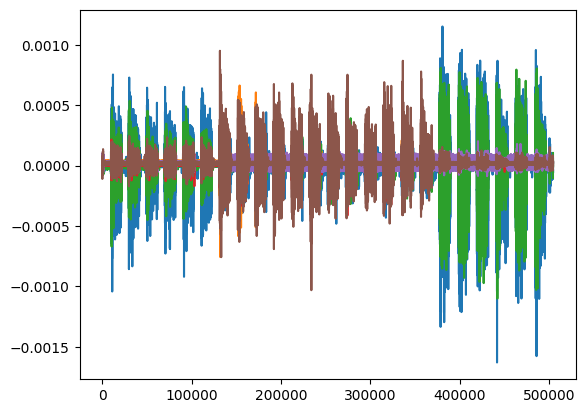

emg形状： (504440, 6)
emg信号数： 504440
emg通道数： 6


In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt

fs = 2000
mat_contents = sio.loadmat('S1_E1.mat')
emg = mat_contents['emg']
plt.plot(emg)
plt.show()
print("emg形状：", emg.shape)
print("emg信号数：", emg.shape[0])
print("emg通道数：", emg.shape[1])

In [2]:
import numpy as np
label = mat_contents['label']
print("label形状：", label.shape)

# 获取非零标签的种类数量
num_labels = len(np.unique(label[:, 0])[np.unique(label[:, 0]) != 0])
print("非零标签有",num_labels,"个")

# 根据非零标签数据把emg信号分割
signal = []
for i in range(1, num_labels + 1):
    sig = emg[label[:,0]==i,:]
    signal.append(sig)

label形状： (504440, 1)
非零标签有 4 个


In [3]:
import numpy as np
import filter

L = 10001
fea_strings=["maxim", "minm", "mean", "peak", "abv", "var", "std", "ku", "sk", "rms", "S", "C", "I", "K", "FC", "MSF", "RMSF", "VF", "RVF", "PSE"]

num_features = len(fea_strings) #获取features数量
num_passages = emg.shape[1]  #获取通道数量
num_loops =6                 #一套动作的重复次数

fea = np.zeros((num_passages, num_features, num_loops, num_labels)) # [6通道/20维特征/6次/4类]  也就是[a通道,n维特征,m次,k类]
for sigclass in range(num_labels):   # 4类动作信号循环
    sig = signal[sigclass]   # 相当于提取出sig1 sig2 sig3 sig4
    print("每一类动作的肌电信号形状", sig.shape)
    for i in range(num_loops):   # 6次动作循环 这个应该是预先做肌电的时候定义好的
        x = sig[i*L: (i+1)*L, :]  # 提取了从第i*L个时间点开始，长度为L的一段信号数据
        print("每一类动作的每一次动作的肌电的信号形状", x.shape)
        x = x.T # 由于后面的特征提取操作需要的是每个特征维度对应的数据排列在一起，因此这里通过.T操作将信号数据转置成（通道，采样）
        # 本质是对每次每个动作的片段进行feature提取
        data=x
        fea[:, :, i, sigclass] = filter.concatenate_features_new2(data,fea_strings).T  # 信号x提特征：6通道*20维
        print(fea.shape)

每一类动作的肌电信号形状 (60006, 6)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的肌电信号形状 (60006, 6)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的肌电信号形状 (60006, 6)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的肌电信号形状 (60006, 6)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动作的每一次动作的肌电的信号形状 (10001, 6)
(6, 20, 6, 4)
每一类动

In [4]:
#### 4维矩阵降维为2维
feature = np.empty((0, num_features))  # 创建一个空的二维矩阵，用于存储所有样本的特征
truth = np.empty((0, 1))  # 创建一个空的向量，用于存储所有样本的标签

for i in range(num_labels):
    for j in range(num_loops):
        # 将每个样本的特征从二维矩阵转换为一维矩阵，并添加到特征矩阵中
        feature_i = fea[:, :, j, i]  # fea的维度为 (6, 20, 6, 4)
        # 以保证展开后的一维矩阵的大小与原来的二维矩阵的元素数量相同
        feature = np.vstack([feature, feature_i])  # 将当前样本的特征添加到特征矩阵中

        # 将当前样本的标签添加到标签向量中
        truth_i = i * np.ones((6, 1))
        truth = np.vstack([truth, truth_i])

print(f"共有{feature.shape[0]}个样本，每个样本{feature.shape[1]}维特征")
print(feature.shape)  # 输出特征矩阵的大小

共有144个样本，每个样本20维特征
(144, 20)


In [6]:
import mlfunctions
feature=mlfunctions.Nomarlization(feature) # 对feature做归一化处理

### 逻辑回归
accuracy1=mlfunctions.lr_multiclass(feature,truth)
print (accuracy1)
### KNN
accuracy2=mlfunctions.KNN(feature,truth,3)
print(accuracy2)
### 朴素贝叶斯
accuracy3=mlfunctions.NB_multiclass(feature, truth)
print(accuracy3)
### 支持向量机
accuracy4=mlfunctions.SVM(feature, truth)
print(accuracy4)
### 多层感知机
accuracy5 =mlfunctions.MLP(feature, truth,(100,100),1000)
print(accuracy5)
### 随机森林
accuracy6 = mlfunctions.Random_forest(feature,truth,100, 2)
print(accuracy6)
### 决策树
accuracy7 = mlfunctions.Decision_tree(feature,truth)
print(accuracy7)
#### LDA
accuracy8 = mlfunctions.LDA(feature,truth)
print(accuracy8)
#### gradient boosting
accuracy9 = mlfunctions.Gradient_boosting(feature,truth)
print(accuracy9)

f:\miniconda3\envs\JupyterLab\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\miniconda3\envs\JupyterLab\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\miniconda3\envs\JupyterLab\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\miniconda3\envs\JupyterLab\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

0.4482758620689655
0.9310344827586207
0.41379310344827586
0.5517241379310345
0.9655172413793104
0.7241379310344828
0.7241379310344828
0.6896551724137931


e:\MLlearning\jupyter_notebook\Matlab\mlfunctions.py:101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
f:\miniconda3\envs\JupyterLab\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\miniconda3\envs\JupyterLab\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8620689655172413
